ValueError: 'label' must be of length 'x'

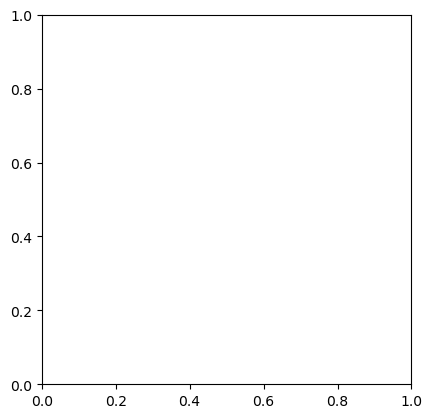

In [97]:
# importer la librairie panda et numpy
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
# importer le csv 
data_csv = pd.read_csv("liste-des-musees-de-france-2021.csv", sep = ";", header = 0)
data_csv.head()
# compter le nombre de musées 
# équivalent au nombre de lignes  
museum_number = len(data_csv)
# dans quelle ville y a-t-il le plus de musées ? 
# on sélectionne toutes les lignes de la colonne des villes
# ici, on obtient une liste de fréquence d'apparition de chaque ville, en commençant par la plus fréquente, Paris (175) 
# cela équivaut au nombre de musées par ville, qui permettra de faire les calculs suivants
city_num = data_csv.value_counts("city")
# quel est le nombre moyen de musée par ville ?
city_mean = np.mean(city_num)
# Quel est le nombre médian de musées par ville ?
city_med = np.median(city_num)
# Comment sont répartis les musées par type (en pourcentage) ? 
# il y a une colonne "tags" dans laquelle, parfois, on rencontre un "type:"
# on va donc dans un premier temps créer une liste qui regroupe tous les éléments pour lesquels un type est annoncé
# on a donc ici un parti-pris restrictif : on aurait pu choisir d'inclure dans les types "art:artcontemporain" même si "type" n'est pas spécifié 
# mais on va partir du principe que la base de données est complète et qu'on n'a pas à la réinterpréter, même si elle est mal faite
types = data_csv[data_csv["tags"].astype(str).str.contains("type") == True]
# idem, on ne cherche pas à savoir l'intention du créateur de la base de données
# il y a plein d'erreurs avec des types qui sont clairement des artefacts, mais on laisse 
# ici on crée la liste des différentstypes classés par fréquence 
by_types = types.value_counts("tags")
# on va transformer ça en une répartition en pourcentages 
# on détermine combien chaque ligne (type) représente par rapport au total de musées qui ont un type
percent = (by_types.values / np.sum(by_types.values)) * 100
# on verra pour le piechart 
fig, ax = plt.subplots()
ax.pie(percent, labels=types["tags"], autopct='%1.1f%%')
# Combien y-a-t-il de musées dont le nom commence par "Château" ?
castles = data_csv[data_csv["name"].astype(str).str.contains("^Château") == True]
# Pour combien de musées dispose-t-on de l'adresse du site web ? 
# c'est équivalent à la length de la colonne en enlevant les NA 
website_number = len(data_csv["website"].dropna())
# quel département français a le plus de musées sur son territoire ? 
# d'abord on fait un compte par département, c'est à dire un values.count 
# il va falloir entrer dans le value.counts les deux premiers chiffres du code postal 
department["department_id"] = data_csv["postal_code"].astype(str).str[:2]
depart_number = department.value_counts("department_id")
# Quel département français possède le plus de musées sur son territoire ?
print(depart_number.astype(int).idxmax())
# quel département français possède le moins de musées sur son territoire ? 
print(depart_number.astype(int).idxmin())
# Combien de musées ont "Napoléon" dans leur nom ? 
napoleon = data_csv[data_csv["name"].astype(str).str.contains("Napoléon") == True]
print(len(napoleon))



